<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SciPy" data-toc-modified-id="SciPy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SciPy</a></span><ul class="toc-item"><li><span><a href="#Special-Function-demo" data-toc-modified-id="Special-Function-demo-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Special Function demo</a></span></li><li><span><a href="#Solving-Differential-Equations" data-toc-modified-id="Solving-Differential-Equations-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Solving Differential Equations</a></span><ul class="toc-item"><li><span><a href="#Concrete-example-of-free-fall:" data-toc-modified-id="Concrete-example-of-free-fall:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Concrete example of free fall:</a></span></li></ul></li><li><span><a href="#Fitting-functions" data-toc-modified-id="Fitting-functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fitting functions</a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Least-Square-Fit:" data-toc-modified-id="Least-Square-Fit:-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Least Square Fit:</a></span><ul class="toc-item"><li><span><a href="#Example-:-Breit-Wigner-Function-to-measured-cross-sections" data-toc-modified-id="Example-:-Breit-Wigner-Function-to-measured-cross-sections-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Example : Breit-Wigner Function to measured cross-sections</a></span></li><li><span><a href="#Example-Exponential-Function-to-a-Histogram" data-toc-modified-id="Example-Exponential-Function-to-a-Histogram-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Example Exponential-Function to a Histogram</a></span></li></ul></li></ul></li></ul></li></ul></div>

## SciPy

`scipy` is an extension to `numpy` with many  additional libraries for numerical calculations, such as *Optimization, Numerical Integration, Statistics, etc.*

Many examples how to use it are in http://scipy-cookbook.readthedocs.io/index.html

In the following we will briefly discuss a few examples particularly relevant for physics: 

* Special Functions
* Differential Equations
* Regression and Fitting
* Fourier-Transformation 



### Special Function demo

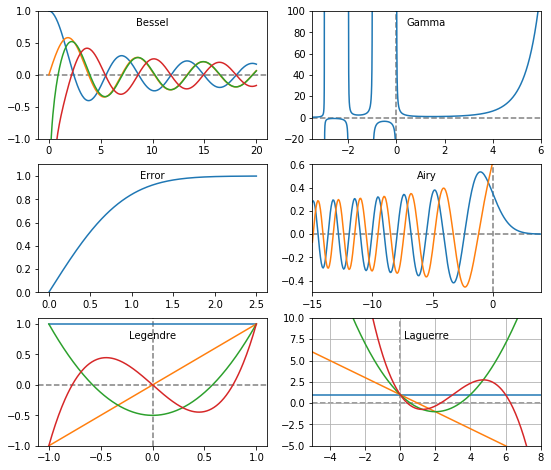

In [3]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

# create a figure window
fig = plt.figure(1, figsize=(9,8))

# create arrays for a few Bessel functions and plot them
x = np.linspace(0, 20, 256)
j0 = scipy.special.jn(0, x)
j1 = scipy.special.jn(1, x)
y0 = scipy.special.yn(0, x)
y1 = scipy.special.yn(1, x)
ax1 = fig.add_subplot(321)  # multiple plots: 3x2 , index 1
ax1.plot(x,j0, x,j1, x,y0, x,y1)
ax1.axhline(color="grey", ls="--", zorder=-1)
ax1.set_ylim(-1,1)
ax1.text(0.5, 0.95,'Bessel', ha='center', va='top',
     transform = ax1.transAxes)

# gamma function
x = np.linspace(-3.5, 6., 3601)
g = scipy.special.gamma(x)
g = np.ma.masked_outside(g, -100, 400)
ax2 = fig.add_subplot(322)  # multiple plots: 3x2 , index 2

ax2.plot(x,g)
ax2.set_xlim(-3.5, 6)
ax2.axhline(color="grey", ls="--", zorder=-1)
ax2.axvline(color="grey", ls="--", zorder=-1)
ax2.set_ylim(-20, 100)
ax2.text(0.5, 0.95,'Gamma', ha='center', va='top',
     transform = ax2.transAxes)

# error function
x = np.linspace(0, 2.5, 256)
ef = scipy.special.erf(x)
ax3 = fig.add_subplot(323)
ax3.plot(x,ef)
ax3.set_ylim(0,1.1)
ax3.text(0.5, 0.95,'Error', ha='center', va='top',
     transform = ax3.transAxes)

# Airy function
x = np.linspace(-15, 4, 256)
ai, aip, bi, bip = scipy.special.airy(x)
ax4 = fig.add_subplot(324)
ax4.plot(x,ai, x,bi)
ax4.axhline(color="grey", ls="--", zorder=-1)
ax4.axvline(color="grey", ls="--", zorder=-1)
ax4.set_xlim(-15,4)
ax4.set_ylim(-0.5,0.6)
ax4.text(0.5, 0.95,'Airy', ha='center', va='top',
     transform = ax4.transAxes)

# Legendre polynomials
x = np.linspace(-1, 1, 256)
lp0 = np.polyval(scipy.special.legendre(0),x)
lp1 = np.polyval(scipy.special.legendre(1),x)
lp2 = np.polyval(scipy.special.legendre(2),x)
lp3 = np.polyval(scipy.special.legendre(3),x)
ax5 = fig.add_subplot(325)
ax5.plot(x,lp0, x,lp1, x,lp2, x,lp3)
ax5.axhline(color="grey", ls="--", zorder=-1)
ax5.axvline(color="grey", ls="--", zorder=-1)
ax5.set_ylim(-1,1.1)
ax5.text(0.5, 0.9,'Legendre', ha='center', va='top',
     transform = ax5.transAxes)

# Laguerre polynomials
x = np.linspace(-5, 8, 256)
lg0 = np.polyval(scipy.special.laguerre(0),x)
lg1 = np.polyval(scipy.special.laguerre(1),x)
lg2 = np.polyval(scipy.special.laguerre(2),x)
lg3 = np.polyval(scipy.special.laguerre(3),x)
ax6 = fig.add_subplot(326)
ax6.plot(x,lg0, x,lg1, x,lg2, x,lg3)
ax6.axhline(color="grey", ls="--", zorder=-1)
ax6.axvline(color="grey", ls="--", zorder=-1)
ax6.set_xlim(-5,8)
ax6.set_ylim(-5,10)
ax6.text(0.5, 0.9,'Laguerre', ha='center', va='top',
     transform = ax6.transAxes)
plt.grid(True);

### Solving Differential Equations

Many systems in physics and science in general are described by differential equations (DE). Analytical solutions exist only for a few special cases, mostly numerical methods are necessary.

SciPy provides (among others) the function `odeint` :

```from scipy.integrate import odeint```

`odeint` can only solve DEs of 1st order. Many problems in physics are DEs of 2nd order, e.g. the equations of motion: 

$$ \frac {d^2y} {dt^2} = F(y, t)$$

This can be handled with a standard trick: one can rewrite a DE 2nd order always as system of 2 coupled DEs 1st order:

$$y_1 = y, \quad y_2 = \frac{dy_1}{dt}$$

to get to two DGs 1st order:

$$\frac {dy_1} {dt} = y_2, \quad \frac {dy_2} {dt} = F (y_1, t)$$


Ansatz with **`odeint`** :
```
y = odeint (F, y0, t)
```

Where:
* F : A Python function `F(yi, ti)` that gets input array `yi` and scalar `ti` and returns array with the 1st derivatives. 
* y0 :  1-d array with start values 
* t : Array with t-values for which y should be calculated 
* y : result array with values y (t) 
***

#### Concrete example of free fall:



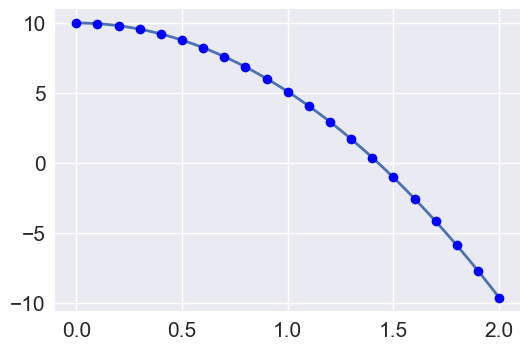

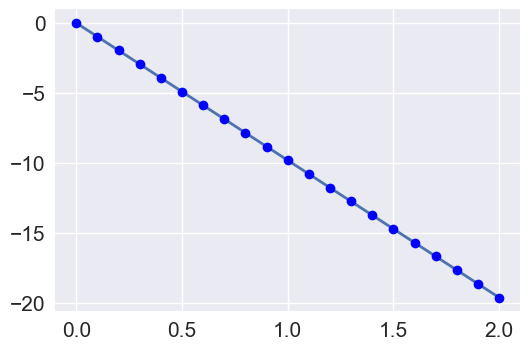

In [8]:
# example for solving simple differential equation for free falling object
# using odeint
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def F(y, t):
        """
        Return derivatives for 2nd order ODE y'' = g.
        """
        g = 9.81
        dy = [0, 0]         # preallocate list to store derivatives
        dy[0] = y[1]        # first derivative of y(t)
        dy[1] = -g          # second derivative of y(t)
        return dy

# array of time values to study
t_min = 0; t_max = 2; dt = 0.02
t = np.arange(t_min, t_max+dt, dt)

# initial conditions
y0 = (10.0, 0.0)

# get series of points 
# y[:,0] corresponds to position (=height)
# y[:,1] corresponds to velocity
y = odeint(F, y0, t)

# display result 
plt.figure()    # Height: Create figure; then, add plots.
plt.plot(t, y[:, 0], linewidth=2)
skip = 5
t_test = t[::skip]   # compare at a subset of points
plt.plot(t_test, y0[0]-0.5*9.81*t_test**2, 'bo') # exact solution for y0 = (1,0)


plt.figure()    # Velocity Create figure; then, add plots.
plt.plot(t, y[:, 1], linewidth=2)
plt.plot(t_test, y0[1]-9.81*t_test, 'bo'); # exact solution for y0 = (1,0)


### Fitting functions
#### Linear regression
Frequently used procedure to fit a linear model to data, typical case is fitting a line to a set of x,y points

Linear regression using polyfit
parameters: a=0.80 b=-4.00 
regression: a=0.76 b=-4.02, ms error= 1.026
Linear regression using sp.stats.linregress
parameters: a=0.80 b=-4.00 
regression: a=0.76 b=-4.02, std error= 0.050


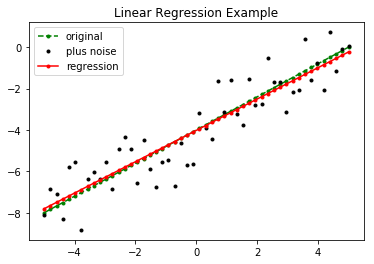

In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#Linear regression example
# This is a very simple example which demonstrates the use 
# of two scipy tools for linear regression: 
#   polyfit and stats.linregress
 
#Sample data creation
#number of points 
n=50
x=sp.linspace(-5,5,n) # array of points from -5 to 5
#parameters
a=0.8; b=-4
y=sp.polyval([a,b],x) # array of points from -5 to 5
#add some noise
yn=y+sp.randn(n)

# 1st version: Linear regression (=polynom-fit) 
# -- polyfit can be used 

(ar,br)=sp.polyfit(x,yn,1) # do the fit

yr=sp.polyval([ar,br],x) # compute residuals based on fitted line

err=sp.sqrt(sum((yr-yn)**2)/n) #compute the mean square error

print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f \nregression: a=%.2f b=%.2f, ms error= %.3f' % (a,b,ar,br,err))

#matplotlib plotting
plt.title('Linear Regression Example')
plt.plot(x,y,'g.--')
plt.plot(x,yn,'k.')
plt.plot(x,yr,'r.-')
plt.legend(['original','plus noise', 'regression'])

# 2nd version: Linear regression using stats.linregress from scipy
import scipy.stats as stats
(a_s,b_s,r,tt,stderr)=stats.linregress(x,yn)
print('Linear regression using sp.stats.linregress')
print('parameters: a=%.2f b=%.2f \nregression: a=%.2f b=%.2f, std error= %.3f' % (a,b,a_s,b_s,stderr))

In [5]:
import scipy.stats

#### Least Square Fit:

Fitting an arbitrary (non-linear) Function to  weighted points (= measurements with uncertainties).

**Basic principle:**  
Minimize $\chi^2$, the quadratic difference between measurement points and fit, weighted by inverse uncertainty squared:

$$ \chi^2 = \sum \frac{(y_{meas}-y_{fit})^2}{  ( \Delta y )^2} $$

The resulting value for $\chi^2$ is an important check whether the fitting model is sensible:

$$ \left< \frac{\chi^2}{  (n_{points} - n_{par} )} \right> \approx 1$$


##### Example : Breit-Wigner Function to measured cross-sections

See Praktikumsversuch Z0-Resonance, M13:

  http://www-static.etp.physik.uni-muenchen.de/fp-versuch/
  
  
  

Fit-result : [ 91.19274891   2.49696625  40.75141749]
Cov-Matrix :
 [[  1.54409017e-05  -2.20633886e-06  -3.95172945e-05]
 [ -2.20633886e-06   5.17655277e-05  -2.74257224e-04]
 [ -3.95172945e-05  -2.74257224e-04   5.69870987e-03]]
    MZ: 91.1927 +-   0.0039 
    GZ:  2.4970 +-   0.0072 
 SPeak: 40.7514 +-   0.0755 
Chi2,ndf,Chi2/ndf:      3.1    4     0.8


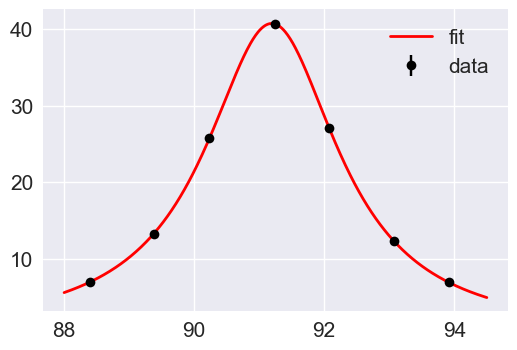

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def BreitWig( x, m, g, spk ): 
    " Breit-Wigner function"
    mw2 = m * m
    gw2 = g * g
    eb2 = x * x
    return( spk * gw2*mw2 / ( ( eb2 - mw2 )**2  + mw2 * gw2 ))

# hadronic cross-section measurements
# center-of-mass energy
xv = np.array([ 88.396, 89.376, 90.234, 91.238, 92.068, 93.080, 93.912 ])
# cross-section
yv = np.array([  6.943, 13.183, 25.724, 40.724, 27.031, 12.273, 6.980 ])
# cross-section uncertainty
ey = np.array([  0.087, 0.119, 0.178, 0.087, 0.159, 0.095, 0.064 ])

# fit parameters: initial values
pinit = np.array([ 90., 2., 20.])

# do the fit
out,cov=curve_fit(BreitWig, xv, yv, pinit, ey)

print ('Fit-result :', out)
print ('Cov-Matrix :\n', cov)

# residuals
r = (yv - BreitWig(xv,out[0],out[1],out[2]))
chi2 = np.sum(r**2/ey**2)

parnames = ['MZ','GZ','SPeak']
for i in range(3):
    print ("%6s: %7.4f +-  %7.4f " % ( parnames[i], out[i], 
                                      np.sqrt(cov[i][i])))

print ("Chi2,ndf,Chi2/ndf:  %7.1f %4d %7.1f" % (chi2,4,chi2/4))    
    
    
l1='data'
plt.errorbar(xv, yv, yerr=ey, fmt='ko',label=l1)

l2='fit'
bins = np.linspace( 88., 94.5, 500)
plt.plot(bins,BreitWig(bins,out[0],out[1],out[2]),'r-',
         lw=2,label=l2)

plt.legend();

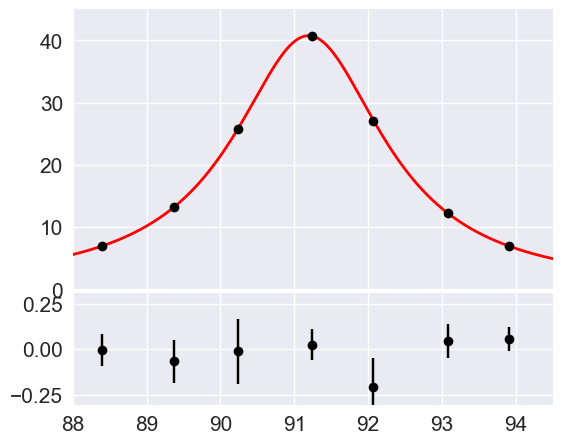

In [2]:
# more sophisticated plot:
# upper plot values and fitted curve
# lower plot residuals
#
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.29, 0.8, 0.7],xlim=(88,94.5),xticklabels=[],ylim=(0,45))
ax2 = fig.add_axes([0.1, 0.0, 0.8, 0.28],xlim=(88,94.5))# ylim=(-3, 3))

ax1.errorbar(xv, yv, yerr=ey, fmt='ko',label=l1)
bins = np.linspace( 88., 94.5, 500)
ax1.plot(bins,BreitWig(bins,out[0],out[1],out[2]),'r-',lw=2,label=l2)
plt.grid(True)
#
# residuals
r = (yv - BreitWig(xv,out[0],out[1],out[2]))
ymax = 1.5*np.max(np.abs(r))
ax2.set_ylim(-ymax,ymax)
ax2.errorbar(xv, r, yerr=ey, fmt='ko');
plt.grid(True)

##### Example Exponential-Function to a Histogram



 Slope:  0.1081 +-   0.0173 
Height: 37.2183 +-   4.9349 


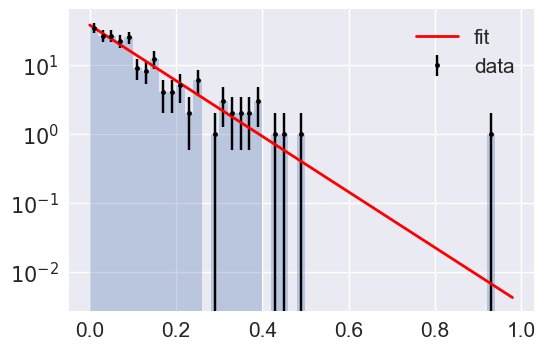

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Generate data

n = 200
isi = np.random.exponential(0.1 , size=n)
db = 0.02
bins = np.arange(0 ,1.0, db)
h = np.histogram(isi, bins)[0]
eh = np.sqrt(h) # stat error
#
# Function to fit
# x - independent variable
# p0, p1 - parameters
fitfunc = lambda x, p0, p1 : p1 * np.exp (- x /p0 ) 

# Initial values for fit parameters
pinit = np.array([ 0.5, 10. ])
# Hist count less than 4 has poor estimate of the weight
# don't use in the fitting process
idx = np.nonzero(h>4)

out,cov=curve_fit(fitfunc,bins[idx]+db/2, h[idx], pinit, eh[idx])
#print ('Fit-result :', out)
parnames = ['Slope','Height']
for i in range(2):
    print ("%6s: %7.4f +-  %7.4f " % ( parnames[i], out[i], 
                                      np.sqrt(cov[i][i])))

l1='data'

#pl.errorbar(bins[idx],h[idx],yerr=eh[idx],fmt='ko',label=l1)
plt.errorbar(bins[:-1]+db/2,h,yerr=eh,fmt='k.',label=l1)
plt.hist(isi, bins,alpha=0.3)

l2='fit'
plt.plot(bins,fitfunc(bins,out[0],out[1]),'r-',lw=2,label=l2)

plt.legend()
plt.yscale('log')
